Conversion Rates:
group
control      0.100394
treatment    0.125000
Name: converted, dtype: float64

Z-Score: 1.7411, P-Value: 0.0408


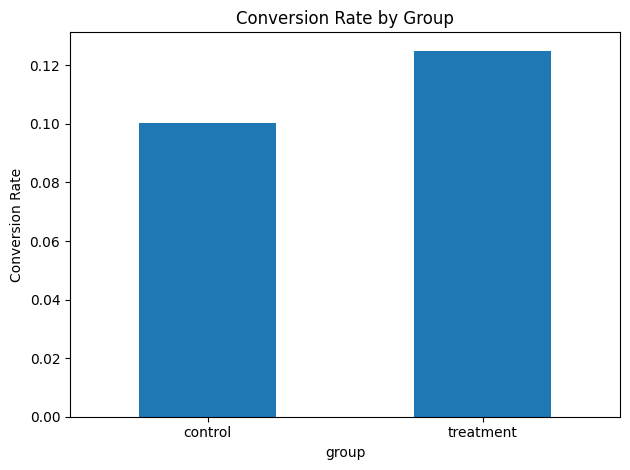

In [1]:
# Uber Eats Subscription A/B Test Simulator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Simulate fake user data
np.random.seed(42)
n_users = 2000
users = pd.DataFrame({
    "user_id": range(1, n_users+1),
    "group": np.random.choice(["control", "treatment"], size=n_users),
})

# Assign conversion rates
users["converted"] = users["group"].apply(lambda x: np.random.binomial(1, 0.10 if x == "control" else 0.13))

# Analyze conversion rates
grouped = users.groupby("group")["converted"]
rates = grouped.mean()
print("Conversion Rates:")
print(rates)

# Run z-test for proportions
control_success = users[users.group == "control"]["converted"].sum()
control_total = users[users.group == "control"].shape[0]
treatment_success = users[users.group == "treatment"]["converted"].sum()
treatment_total = users[users.group == "treatment"].shape[0]

p1 = control_success / control_total
p2 = treatment_success / treatment_total
p_pool = (control_success + treatment_success) / (control_total + treatment_total)
z_score = (p2 - p1) / np.sqrt(p_pool * (1 - p_pool) * (1/control_total + 1/treatment_total))
p_value = 1 - stats.norm.cdf(z_score)

print(f"\nZ-Score: {z_score:.4f}, P-Value: {p_value:.4f}")

# Visualize
rates.plot(kind="bar", title="Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
